# LAB3

Name: AKSHAY KEKUDA

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (
    OneHotEncoder, LabelEncoder, Binarizer, KBinsDiscretizer,
    MaxAbsScaler, StandardScaler, MinMaxScaler
)

In [37]:
from google.colab import files
uploaded = files.upload()

Saving kekuda_1_lab3.ipynb to kekuda_1_lab3.ipynb


In [38]:
df = pd.read_csv('Social_Network_Ads.csv')

In [39]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

The data set does not have any missing values.

In [40]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [41]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

The data types of the data set are as expected

In [42]:
df['User ID'].is_unique

True

Since the USER ID column has retured True for is_unique check, we can say that there are no duplicate data.

Let us now analyze the Gender attribute

In [43]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [44]:
df['Gender'].describe()

count        400
unique         2
top       Female
freq         204
Name: Gender, dtype: object

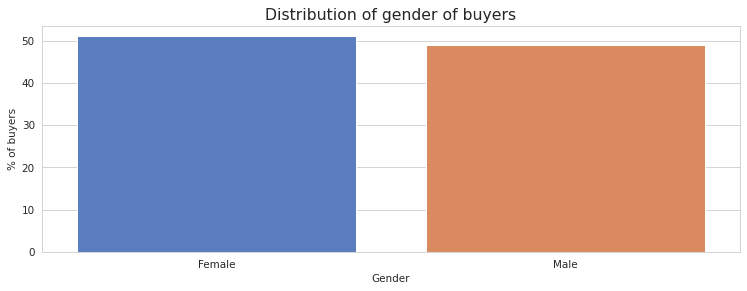

In [45]:
data = df.Gender.value_counts(normalize = 'True') * 100
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,4), dpi=75)
ax1 = fig.add_subplot(111)
sns.barplot(x=data.keys(), y=data, ci=None, palette="muted",orient='v', ax=ax1)
ax1.set_title("Distribution of gender of buyers", fontsize=15)
ax1.set_xlabel ("Gender")
ax1.set_ylabel ("% of buyers")
plt.show()

The gender atttribute has no missing/abnormal data. The percentage of female buyers is slightly higher than that of male buyers.

Let us now look at the Age of the buyers

In [46]:
df.Age.describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

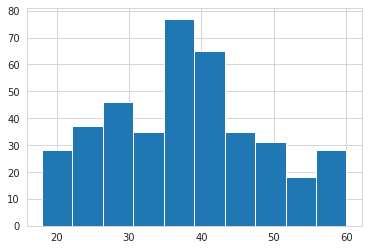

In [47]:
df.Age.hist()
plt.show()

In [48]:
print("Max buyers are of age {} years".format(df.Age.mode()[0]))
print("Median age of buyers is {} years".format(int(df.Age.median())))

Max buyers are of age 35 years
Median age of buyers is 37 years


Let us look at the salary attribute of the buyers.

In [49]:
df.EstimatedSalary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

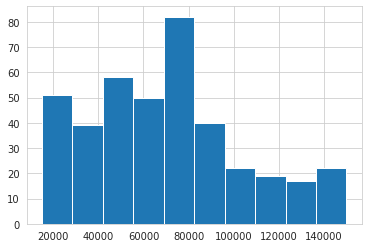

In [50]:
df.EstimatedSalary.hist()

In [51]:
print("Max buyers have a salary of ${}".format(df.EstimatedSalary.mode()[0]))
print("Median salary of buyers is ${}".format(int(df.EstimatedSalary.median())))

Max buyers have a salary of $72000
Median salary of buyers is $70000


Let us look at the class Purchased

In [52]:
df.Purchased.value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

Since the data doesn't describe what 1 and 0 stands for , I assume 1 signifies pruchase of a product and 0 signifies not purchases. At the outset from the given data it looks like 64% of the buyers did not buy the product. It can be due to a variety of reason, like the product may be not affordable to many of the people from the data set or it may cater to an age group that is not centered around the mode/median age of the buyers. 

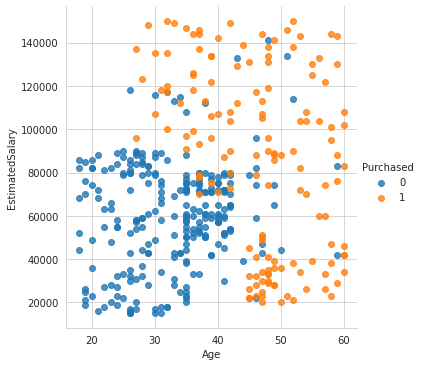

In [53]:
sns.lmplot(data=df, x="Age", y="EstimatedSalary", fit_reg=False, hue="Purchased")
plt.show()

As can be seen from the above graph, we see that people below age 40 years and having a salary less that 80000 have not purchased the the product.

<Figure size 1050x1050 with 0 Axes>

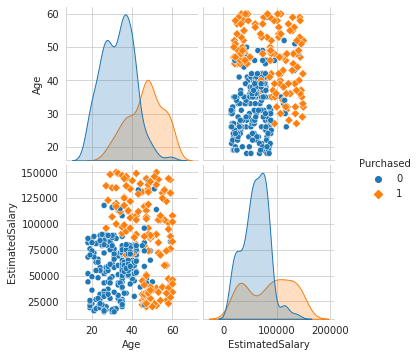

In [54]:
fig = plt.figure(figsize=(14,14), dpi=75)
sns.pairplot(df[df.columns[1:]], kind="scatter", markers=["o", "D"], hue="Purchased")

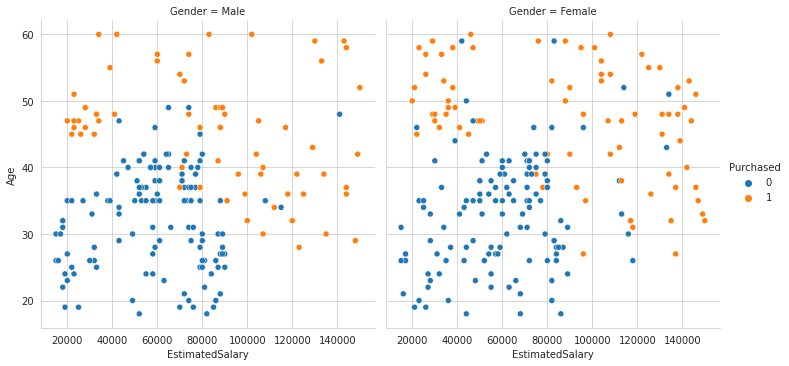

In [55]:
sns.relplot(x="EstimatedSalary", y="Age", hue="Purchased", col="Gender", data=df);

The above plot illustrates the point that the the distribution of males and females who have not purchased the product is similar i.e people belonging to both the genders with a salary of less than 80k and age less than 40 have not purchased the product

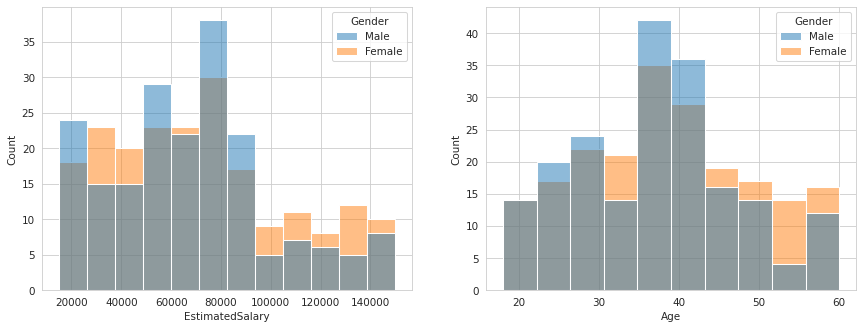

In [56]:
fig = plt.figure(figsize=(14,5), dpi=75)
plt.subplot(121)
sns.histplot(df, x = 'EstimatedSalary', hue = 'Gender')
plt.subplot(122)
sns.histplot(df, x = 'Age', hue = 'Gender')
plt.show()

The above graph shows that in the data set the more number of males have salaries around the median salary. Surprisingly number of females receiving high salaries(>100k) are more than males. 

Before we proceeed we can encode Male and Female gender as 1 and 0 respectively.

In [57]:
for index, rows in df.iterrows():
  df.at[index, 'Gender'] = 1 if df.iloc[index]['Gender'] == 'Male' else 0

In [58]:
df.Gender.value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [59]:
df['Gender'] = df['Gender'].astype(int)
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

We have now converted the Gender data type to type int

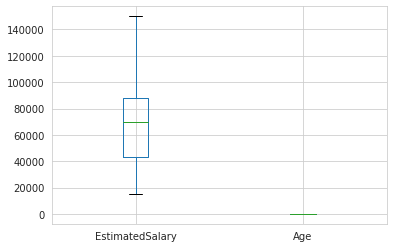

In [60]:
df.boxplot(column = ["EstimatedSalary", "Age"])
plt.show()

As age and estimated salary are in a different scale, we will normalize these columns


In [61]:
scaled_df = df.copy(deep=True)
num_cols = scaled_df.columns[2:4]
min, max = 0, 1 # new scale
for c in num_cols:
    X = scaled_df[c]
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    scaled_df[c] = X_scaled

In [62]:
scaled_df.dtypes

User ID              int64
Gender               int64
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

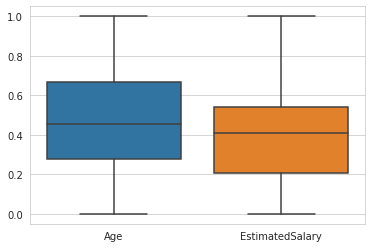

In [63]:
sns.boxplot(data=scaled_df[num_cols])
plt.show()

From the above graph, we can see that the data has no outliers. 

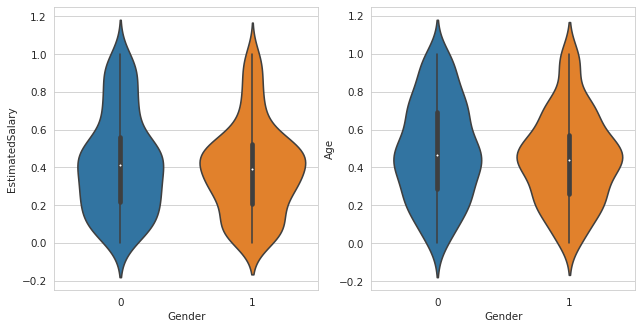

In [64]:
fig = plt.figure(figsize=(10,5), dpi=75)
plt.subplot(121)
sns.violinplot(x=scaled_df['Gender'], y=scaled_df['EstimatedSalary'])
plt.subplot(122)
sns.violinplot(x=scaled_df['Gender'], y=scaled_df['Age'])
plt.show()

The above vioilin plot emphasizes on the point that distribution of males and females are not totally similar. There are more males( represented by 0) around the median salary and age.

In [65]:
scaled_df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,0.467976,0.405500,0.357500
std,7.165832e+04,0.500526,0.249592,0.252570,0.479864
min,1.556669e+07,0.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,0.000000,0.279762,0.207407,0.000000
50%,1.569434e+07,0.000000,0.452381,0.407407,0.000000
75%,1.575036e+07,1.000000,0.666667,0.540741,1.000000
max,1.581524e+07,1.000000,1.000000,1.000000,1.000000


In [66]:
scaled_df.dtypes

User ID              int64
Gender               int64
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [67]:
scaled_df[scaled_df.columns[1:]].corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


Age and Estimated Salary have very less correlation. 

##Data Dictionary of preprocessed data

|#|Attribute|Data Type|Range|Attribute Type|Description|
|-:|:-|:-|:-|:-|:-|
|1|User Id|int64|[1556669,1581542]| integer| User ID of the buyer. This data is not of much importance for preprocessing
|2|Gender|int64|0 or 1|categorical| 1 indicates Male category and 0 indicates female category
|3|EstimatedSalary|float64|[0,1]|floating|Gives the estimated salary of the buyers. This data has been scaled to (0,1)
|4|Age|float64|[0,1]| floating| Gives the age of the buyer. This data has been scaled to (0,1)
|5|Purchased|int64|0 or 1| categorical| 0 signifies that the buyer has not purchased the product and 1 signifies that the buyer has purchased


Note: We can convert estimated salary and age to categorical data for visualization purposes.
Also we will not be using User Id attibute for further analysis

We will now start with building the classifiers

In [68]:
X = scaled_df[['Age', 'EstimatedSalary', 'Gender']]
y = scaled_df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [69]:
X_train.shape

(268, 3)

In [70]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train) # fit training data
y_hat_tr = knn.predict(X_train)
err_tr = 1 - accuracy_score(y_train, y_hat_tr)
y_hat_te = knn.predict(X_test)
err_te = 1 - accuracy_score(y_test, y_hat_te)
print("KNN Training error: {} Test Error: {}".format(err_tr, err_te))

KNN Training error: 0.08208955223880599 Test Error: 0.08333333333333337


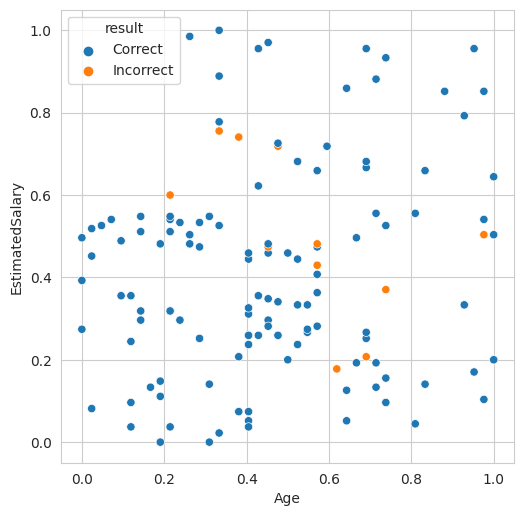

In [71]:
X_test2 = X_test.copy()
X_test2['result'] = ['Correct' if x else 'Incorrect' for x in (y_hat_te == y_test)]

import seaborn as sns
fig, ax1 = plt.subplots(figsize=(6,6), dpi=100)
sns.scatterplot(data=X_test2, x="Age", y="EstimatedSalary", hue='result')
ax1.set_aspect(1.0)

<Figure size 2000x2000 with 0 Axes>

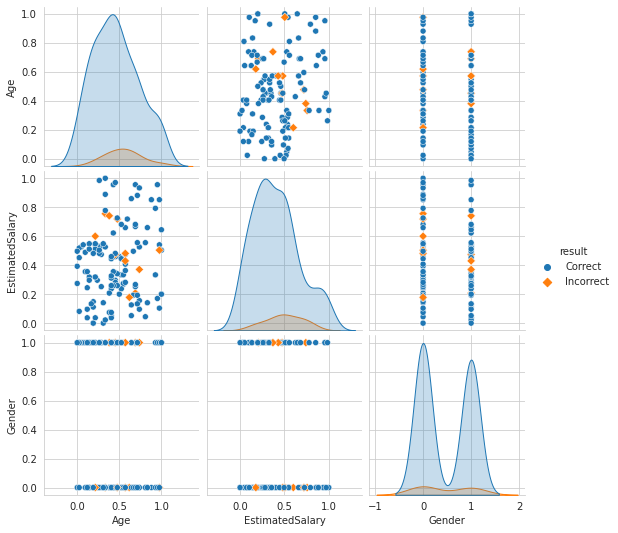

In [72]:
fig = plt.figure(figsize=(20,20), dpi=100)
sns.pairplot(data=X_test2, kind="scatter", hue="result", markers=["o", "D"])
plt.show()

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat_tr = lr.predict(X_train)
err_tr = 1 - accuracy_score(y_train, y_hat_tr)
y_hat_te = lr.predict(X_test)
err_te = 1 - accuracy_score(y_test, y_hat_te)
print(" Logistic Regression Training error: {} Test Error: {}".format(err_tr, err_te))

 Logistic Regression Training error: 0.19029850746268662 Test Error: 0.16666666666666663


In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_hat_tr = dtc.predict(X_train)
err_tr = 1 - accuracy_score(y_train, y_hat_tr)
y_hat_te = dtc.predict(X_test)
err_te = 1 - accuracy_score(y_test, y_hat_te)
print("Decision Tree Classifier Training error: {} Test Error: {}".format(err_tr, err_te))

Decision Tree Classifier Training error: 0.0 Test Error: 0.12878787878787878


In [75]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_hat_tr = nb.predict(X_train)
err_tr = 1 - accuracy_score(y_train, y_hat_tr)
y_hat_te = nb.predict(X_test)
err_te = 1 - accuracy_score(y_test, y_hat_te)
print("Gaussain Naive Bayes Training error: {} Test Error: {}".format(err_tr, err_te))

Gaussain Naive Bayes Training error: 0.11194029850746268 Test Error: 0.09090909090909094


In [76]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)
y_hat_tr = svc.predict(X_train)
err_tr = 1 - accuracy_score(y_train, y_hat_tr)
y_hat_te = svc.predict(X_test)
err_te = 1 - accuracy_score(y_test, y_hat_te)
print("Support Vector Classifier Training error: {} Test Error: {}".format(err_tr, err_te))

Support Vector Classifier Training error: 0.17537313432835822 Test Error: 0.12878787878787878


In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_hat_tr = rfc.predict(X_train)
err_tr = 1 - accuracy_score(y_train, y_hat_tr)
y_hat_te = rfc.predict(X_test)
err_te = 1 - accuracy_score(y_test, y_hat_te)
print("Random Forest Classifier Training error: {} Test Error: {}".format(err_tr, err_te))

Random Forest Classifier Training error: 0.0 Test Error: 0.09090909090909094


Summarizing the above results, we have the following observations:
<br></br>

|#|Classifier Type|Training Error|Test Error|
|-:|:-|:-|:-|
|1|LogisticRegression|0.19|0.16|
|2|KNeighborsClassifier|0.08|0.08|
|3|DecisionTreeClassifier|0.0|0.12|
|4|GaussianNB|0.11|0.09|
|5|LinearSVC|0.17|0.12|
|6|RandomForestClassifier|0.00|0.08|

As can be seen from the above table, random forest classifier gives the least train and test error rates. This will change on running the above block of codes multiple times. Decsison Tree classifier does well on training data but not on test data

In [78]:
X.head()

,Age,EstimatedSalary,Gender
0,0.023810,0.029630,1
1,0.404762,0.037037,1
2,0.190476,0.207407,0
3,0.214286,0.311111,0
4,0.023810,0.451852,1


**Repeated Train test Split**

In [79]:
kf = KFold(n_splits=3, shuffle=True)
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    
    y_hat_tr = knn.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = knn.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print("KNN err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.0714, err.test=0.1269
Fold 2: err.train=0.0787, err.test=0.1128
Fold 3: err.train=0.0936, err.test=0.0451
KNN err_train(avg)=0.0812, err_test(avg)=0.0949


In [80]:
kf = KFold(n_splits=3, shuffle=True)
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr.fit(X_train, y_train)
    
    y_hat_tr = lr.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = lr.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print(" Logistic Regression err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.1504, err.test=0.2239
Fold 2: err.train=0.1723, err.test=0.1654
Fold 3: err.train=0.1873, err.test=0.1880
 Logistic Regression err_train(avg)=0.1700, err_test(avg)=0.1924


In [81]:
kf = KFold(n_splits=3, shuffle=True)
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dtc.fit(X_train, y_train)
    
    y_hat_tr = dtc.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = dtc.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print("Decision Tree Classifiers err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.0000, err.test=0.1343
Fold 2: err.train=0.0037, err.test=0.1053
Fold 3: err.train=0.0000, err.test=0.1579
Decision Tree Classifiers err_train(avg)=0.0012, err_test(avg)=0.1325


In [82]:
kf = KFold(n_splits=3, shuffle=True)
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    nb.fit(X_train, y_train)
    
    y_hat_tr = nb.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = nb.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print(" Naive Bayes err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.0827, err.test=0.1493
Fold 2: err.train=0.1124, err.test=0.0902
Fold 3: err.train=0.1161, err.test=0.0977
 Naive Bayes err_train(avg)=0.1037, err_test(avg)=0.1124


In [83]:
kf = KFold(n_splits=3, shuffle=True)
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svc.fit(X_train, y_train)
    
    y_hat_tr = svc.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = svc.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print("SVC err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.1955, err.test=0.1418
Fold 2: err.train=0.1461, err.test=0.1504
Fold 3: err.train=0.1348, err.test=0.2105
SVC err_train(avg)=0.1588, err_test(avg)=0.1676


In [84]:
kf = KFold(n_splits=3, shuffle=True)
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc.fit(X_train, y_train)
    
    y_hat_tr = rfc.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = rfc.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print(" Random Forest Classifier err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.0000, err.test=0.0896
Fold 2: err.train=0.0037, err.test=0.1429
Fold 3: err.train=0.0000, err.test=0.0977
 Random Forest Classifier err_train(avg)=0.0012, err_test(avg)=0.1101


Summarizing the above results, we have the following observations on 3 fold runs:
<br></br>

|#|Classifier Type|Training Error|Test Error|3-fold Train Err| 3-fold Test err|
|-:|:-|:-|:-|:-|:-|
|1|LogisticRegression|0.19|0.16|0.17|0.18
|2|KNeighborsClassifier|0.08|0.08|0.07|0.09
|3|DecisionTreeClassifier|0.00|0.12|0.00|0.13
|4|GaussianNB|0.11|0.09|0.10|0.12
|5|LinearSVC|0.17|0.12|0.16|0.17
|6|RandomForestClassifier|0.00|0.08|0.00|0.11|

As can be seen from the above table, KNN classifier gives the least test error rates on multiple test runs. We saw that RFC was also giving low test error rate but on multiple runs its changing. Even though Random Forest Classifier and Decision tree classifiers do well on training data they dont generalize well to test data